In [1]:
# general 
import datetime

# data analysis and wrangling
import pandas as pd

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pickling
import pickle

%matplotlib inline

### Reading Dataframe

In [2]:
#Read in the data from a csv file using Pandas
df = pd.read_csv("bus_data/cleaned_data/line15_00150001.csv", low_memory=False)
df.head(100)

,Unnamed: 0,Timestamp,LineID,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Lon,Lat,VehicleID,StopID,AtStop,HumanTime,Day,Hour,Runtime
0,396,1352181644000000,15.0,0,150001,2012-11-06,5891,-6.153783,53.402687,33553,6319,1,2012-11-06 06:00:44,1,6,0
1,541,1352181825000000,15.0,0,150001,2012-11-06,5891,-6.163521,53.399288,33553,4594,1,2012-11-06 06:03:45,1,6,181
2,609,1352181904000000,15.0,0,150001,2012-11-06,5891,-6.173066,53.402138,33553,4595,1,2012-11-06 06:05:04,1,6,260
3,640,1352181944000000,15.0,0,150001,2012-11-06,5891,-6.177130,53.402370,33553,4596,1,2012-11-06 06:05:44,1,6,300
4,686,1352182003000000,15.0,0,150001,2012-11-06,5891,-6.181091,53.401699,33553,4563,1,2012-11-06 06:06:43,1,6,359
5,763,1352182084000000,15.0,0,150001,2012-11-06,5891,-6.184258,53.399723,33553,1218,1,2012-11-06 06:08:04,1,6,440
6,833,1352182166000000,15.0,0,150001,2012-11-06,5891,-6.187183,53.396484,33553,1270,1,2012-11-06 06:09:26,1,6,522
7,902,1352182245000000,15.0,0,150001,2012-11-06,5899,-6.153783,53.402687,33498,6319,1,2012-11-06 06:10:45,1,6,0
8,939,1352182285000000,15.0,0,150001,2012-11-06,5891,-6.195288,53.391106,33553,1273,1,2012-11-06 06:11:25,1,6,641
9,984,1352182342000000,15.0,0,150001,2012-11-06,5891,-6.198000,53.388981,33553,1274,1,2012-11-06 06:12:22,1,6,698


In [4]:
stop_6282 = df[df.StopID == 6282]
stop_6282

,Unnamed: 0,Timestamp,LineID,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Lon,Lat,VehicleID,StopID,AtStop,HumanTime,Day,Hour,Runtime
77,4782,1352185249000000,15.0,0,150001,2012-11-06,5899,-6.323400,53.271549,33498,6282,1,2012-11-06 07:00:49,1,7,3004
112,6789,1352186331000000,15.0,0,150001,2012-11-06,5902,-6.314483,53.273048,33620,6282,1,2012-11-06 07:18:51,1,7,3525
232,12102,1352188852000000,15.0,0,150001,2012-11-06,5920,-6.328650,53.271416,33502,6282,1,2012-11-06 08:00:52,1,8,4850
238,12237,1352188914000000,15.0,0,150001,2012-11-06,5930,-6.328550,53.271317,33515,6282,1,2012-11-06 08:01:54,1,8,4346
263,13145,1352189349000000,15.0,0,150001,2012-11-06,5912,-6.331183,53.276283,33621,6282,1,2012-11-06 08:09:09,1,8,4724
296,14370,1352189934000000,15.0,0,150001,2012-11-06,5937,-6.328400,53.271217,33516,6282,1,2012-11-06 08:18:54,1,8,4943
384,17370,1352191381000000,15.0,0,150001,2012-11-06,5945,-6.328434,53.271252,33546,6282,1,2012-11-06 08:43:01,1,8,5768
481,20227,1352192821000000,15.0,0,150001,2012-11-06,5844,-6.323383,53.271549,33490,6282,1,2012-11-06 09:07:01,1,9,5786
595,23379,1352194501000000,15.0,0,150001,2012-11-06,5779,-6.328300,53.271133,33470,6282,1,2012-11-06 09:35:01,1,9,6167
631,24339,1352195043000000,15.0,0,150001,2012-11-06,5793,-6.328200,53.271049,33488,6282,1,2012-11-06 09:44:03,1,9,5269


### Training on entire dataset

In [3]:
# Setting up descriptive & target features

features = ["Day", "Hour", "StopID"]

X = pd.concat([df[features]], axis=1)
y = df.Runtime

X.head()

,Day,Hour,StopID
0,1,6,6319
1,1,6,4594
2,1,6,4595
3,1,6,4596
4,1,6,4563


In [4]:
rfc = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

In [5]:
rfc.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [6]:
rfc_predictions = rfc.predict(X)

In [7]:
# print("Accuracy: ", metrics.accuracy_score(y, rfc_predictions))
# print("Confusion matrix: \n", metrics.confusion_matrix(y, rfc_predictions))
# print("Classification report:\n ", metrics.classification_report(y, rfc_predictions))

print("R Squared: ", metrics.r2_score(y, rfc_predictions))
print("neg_mean_absolute_error: ", metrics.mean_absolute_error(y, rfc_predictions))
print("mean_squared_error: ", metrics.mean_squared_error(y, rfc_predictions))
print("median_absolute_error: ", metrics.median_absolute_error(y, rfc_predictions))

R Squared:  0.928218723141
neg_mean_absolute_error:  265.455462245
mean_squared_error:  161902.0563
median_absolute_error:  188.368425426


In [8]:
true_v_pred = pd.DataFrame({'Actual Value': y, 'Predicted Value': rfc_predictions, 'Hour': df.Hour, 'Day': df.Day})
true_v_pred

,Actual Value,Day,Hour,Predicted Value
0,0,1,6,121.935507
1,181,1,6,274.962664
2,260,1,6,352.875881
3,300,1,6,395.434363
4,359,1,6,465.118282
5,440,1,6,533.556927
6,522,1,6,614.823609
7,0,1,6,121.935507
8,641,1,6,638.462359
9,698,1,6,762.466415


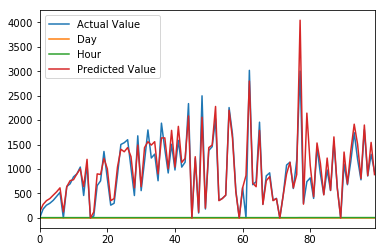

In [9]:
true_v_pred.head(100).plot()

In [10]:
# pickling the model to be used later
filename = 'line15_RF.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [11]:
# pulling the pickled model, to test with

In [19]:
pickled_rfc = pickle.load(open(filename, 'rb'))

In [37]:
# new dataframe

info = [{
    'Day': 3,
    'Hour': 8,
    'StopID': 4596,
}]
single_df = pd.DataFrame(info)

# single_df = pd.DataFrame({'Day': 5, 'Hour': 3, 'StopID': 4596})
# single_df = pd.DataFrame.from_dict(info, orient='columns')


new_predictions = pickled_rfc.predict(single_df)

In [41]:
print(type(new_predictions[0]))

<class 'numpy.float64'>


### Train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [111]:
# Fit model on training dataset
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [112]:
# Predicted class labels for test examples, 
rfc_predictions = rfc.predict(X_test)

In [113]:
# Accuracy metrics

print("R Squared: ", metrics.r2_score(y_test, rfc_predictions))
print("neg_mean_absolute_error: ", metrics.mean_absolute_error(y_test, rfc_predictions))
print("mean_squared_error: ", metrics.mean_squared_error(y_test, rfc_predictions))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, rfc_predictions))

R Squared:  0.919247387745
neg_mean_absolute_error:  288.619570621
mean_squared_error:  182754.1617
median_absolute_error:  207.030717657


In [114]:
true_v_pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rfc_predictions})
true_v_pred = true_v_pred.reset_index()
true_v_pred = true_v_pred.drop('index', 1)
true_v_pred

,Actual Value,Predicted Value
0,4273,3994.881497
1,1101,1034.707989
2,2604,2189.754908
3,644,1006.821468
4,3739,3504.204445
5,3881,3879.343297
6,0,0.000000
7,219,347.369075
8,3241,2660.466501
9,3318,3221.060305


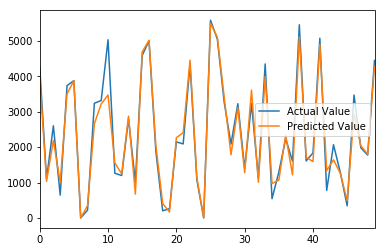

In [120]:
# Plotting predicted vs actual runtime on a training set
true_v_pred.head(50).plot()